##### Alternative more musical metrics
The following proposed metrics uses another kind of comparison with in respect with the one proposed previously:
The following metrics compares and rates the chords recognised basing what is found on the quantity of notes per chord on the quantized sample  

In [ ]:
def compute_goodness_notes_based(chord_list=None, ground_truth_list =None, chroma_templates=templates,chroma_labels=chroma_labels):
    N, K = chroma_templates.shape
    print(K)
    L = len(chord_list)
    L_gt = len(ground_truth_list)
    counter = 0
    if L==L_gt:
        chromas_recognised = np.zeros((N,L),)
        chromas_ground_truth = np.zeros((N,L_gt))
        for i in np.arange(L):
            # print("notesValue")
            # print(np.where(chroma_labels == chord_list[i] )[0])
            notesValue = np.where(chroma_labels == chord_list[i] )[0]
            if(len(notesValue) == 0):
                chromas_recognised[:,i] = np.zeros((1,12))
            else:
                chromas_recognised[:,i] = chroma_templates[:,notesValue[0]]
            
            notesValue_gt = np.where(chroma_labels == ground_truth_list[i] )[0]
            # print("notesValueGT")
            # print(notesValue_gt)
            if(len(notesValue_gt) == 0):
                chromas_ground_truth[:,i] = np.zeros((1,12))
            else:
                chromas_ground_truth[:,i] = chroma_templates[:,notesValue_gt[0]]
            
        logical_and_result = np.logical_and(chromas_recognised,chromas_ground_truth)
        unique, counts = np.unique(logical_and_result, return_counts=True)
        numOfElementsInAnd = dict(zip(unique, counts))
        print(numOfElementsInAnd)
        unique, counts = np.unique(chromas_recognised, return_counts=True)
        numOfElementsInRecognised = dict(zip(unique, counts))
        print(numOfElementsInRecognised)
        goodness = numOfElementsInAnd[True]/numOfElementsInRecognised[True]
        print(goodness)

        print(chord_list)
        fig = plt.figure(figsize=(21, 7))
        plt.imshow(chromas_recognised, origin='lower', aspect='auto', cmap = 'gray_r')
        plt.yticks(np.arange(12), chroma_labels_names)
        plt.xticks(np.arange(L), chord_list)
        print(ground_truth_list)
        fig = plt.figure(figsize=(21, 7))
        plt.imshow(chromas_ground_truth, origin='lower', aspect='auto', cmap = 'gray_r')
        plt.yticks(np.arange(12), chroma_labels_names)
        plt.xticks(np.arange(L), ground_truth_list)
        fig = plt.figure(figsize=(21, 7))
        plt.imshow(logical_and_result, origin='lower', aspect='auto', cmap = 'gray_r')
        plt.yticks(np.arange(12), chroma_labels_names)
        plt.xticks(np.arange(L), ground_truth_list)
        return goodness
    else:
        print('Lists must have same length!')
        print('L_chord: ', L)
        print('L_gt: ', L_gt)

True
24
{False: 2739, True: 657}
{0.0: 2559, 1.0: 837}
0.7849462365591398
['C:min', 'B', 'B', 'D#:min', 'G#:min', 'B', 'C#:min', 'F#', 'D#:min', 'B', 'G#:min', 'D#:min', 'B', 'B', 'B:min', 'B:min', 'G#:min', 'B:min', 'D', 'G', 'D', 'D', 'B:min', 'F#', 'F#', 'F#', 'F#', 'F#', 'B', 'D#:min', 'G#:min', 'D#:min', 'E', 'F#', 'F#', 'B', 'D#:min', 'G#:min', 'B', 'B:min', 'B:min', 'B:min', 'G#:min', 'B:min', 'D', 'G', 'G', 'B:min', 'F#:min', 'F#', 'F#', 'E:min', 'E', 'E', 'E', 'A', 'A', 'D', 'C#:min', 'C#:min', 'F#', 'F#:min', 'D', 'D', 'D', 'D', 'D', 'D', 'E', 'A', 'A', 'A', 'C#:min', 'C#:min', 'D', 'B:min', 'F#:min', 'F#:min', 'A', 'F#', 'B', 'D#:min', 'G#:min', 'D#:min', 'C#:min', 'F#', 'F#', 'D#:min', 'D#:min', 'G#:min', 'B', 'B:min', 'B:min', 'D', 'G#:min', 'G#:min', 'B:min', 'G', 'G', 'D', 'F#', 'F#', 'F#', 'F#', 'F#:min', 'F#', 'B', 'B', 'D#:min', 'D#:min', 'E', 'F#', 'F#', 'B', 'B', 'G#:min', 'B', 'D', 'B:min', 'B:min', 'B:min', 'D', 'B:min', 'B:min', 'B:min', 'B:min', 'B', 'F#', 'F#',

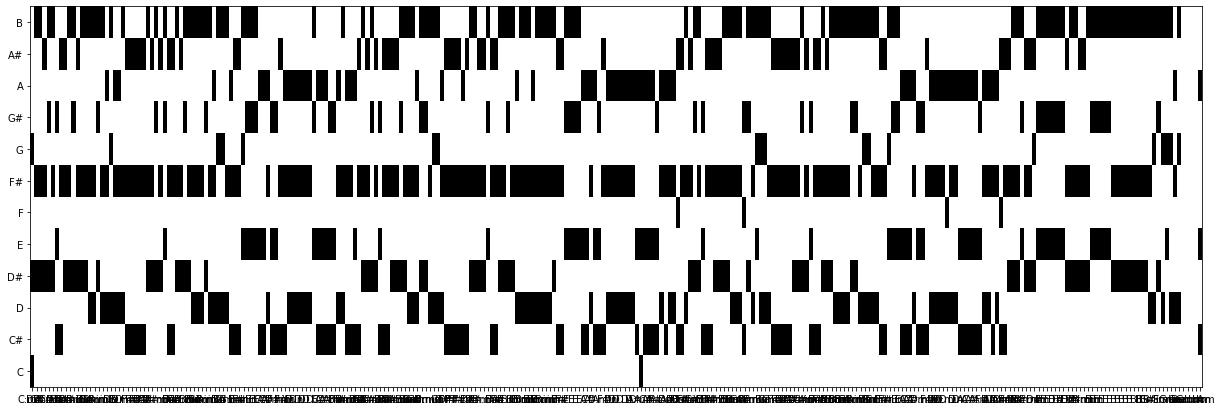

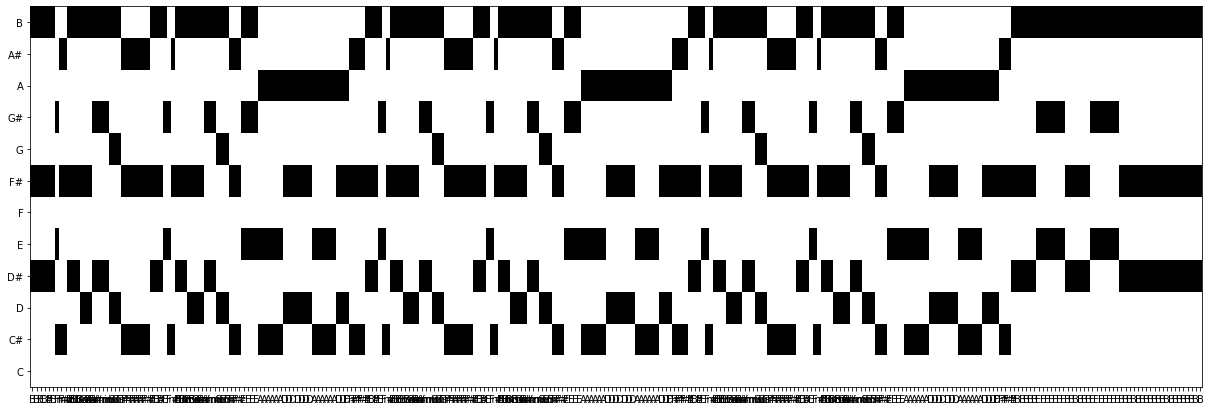

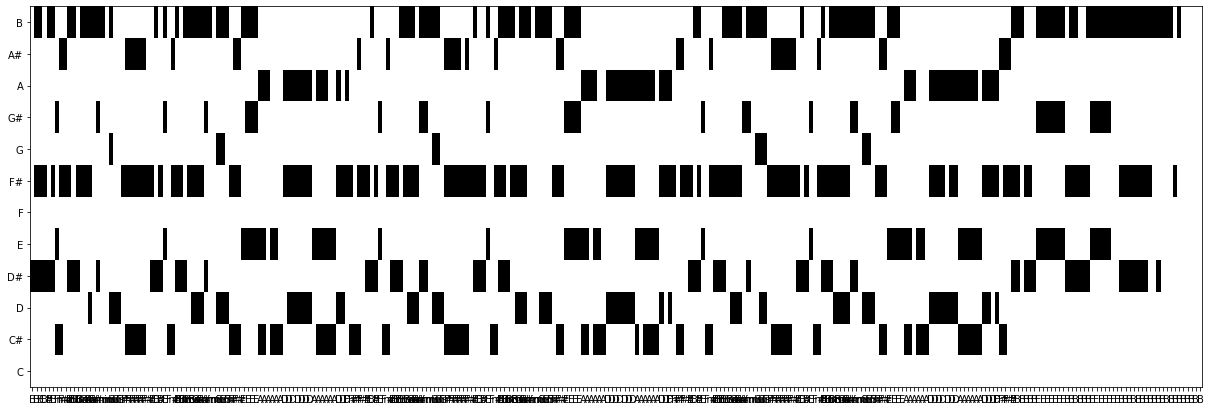

In [ ]:

# fn_wav = os.path.join('data', 'wav', 'Beatles_LetItBe.wav')
# fn_wav = os.path.join('data', 'wav', 'Beatles_HereComesTheSun.wav')
# fn_wav = os.path.join('data', 'wav', 'Beatles_ObLaDiObLaDa.wav')
fn_wav = os.path.join('data', 'wav', 'Beatles_PennyLane.wav')
obla = "./data/csv/Beatles_ObLaDiObLaDa.csv"
letit = "./data/csv/Beatles_LetItBe.csv"
here = "./data/csv/Beatles_HereComesTheSun.csv"
penny = "./data/csv/Beatles_PennyLane.csv"



chordListValue, Fs_featureVal, chords_sim, chords_max = computeChordListEval(fn_wav, smoothing_window_length=7, smoothing_down_sampling=7)
myList, end = loadCSV(penny, Fs_featureVal,len(chordListValue))
#print(chordListValue)
# print(len(chordListValue))
# print(Fs_featureVal)
comp = stripList (myList, chroma_labels)
isCorrect = correct_strip_check(comp,chroma_labels)
print(isCorrect)
goodness = compute_goodness(chordListValue, comp)
compute_goodness_notes_based(chordListValue,comp)
print(goodness)
